# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load CSV

In [12]:
df = pd.read_csv(r"D:\rockfall\rockfall_timeseries_flat.csv")

print(df.head())

# Assume we are predicting 'value' column
data = df["rockfall_prob"].values.reshape(-1, 1)  

   displacement  velocity  acceleration        cav  event_count  magnitude  \
0      0.115236  2.880048      2.685653   2.880048          4.0   1.646370   
1      0.163237  5.565701      2.828238   8.445748          1.0   1.605785   
2      0.300759  8.536524     -0.540703  16.982272          2.0   1.254818   
3      0.447787  4.484294     -3.708173  21.466566          2.0   2.796105   
4      0.450236  1.120178     -0.122901  22.586744          4.0   2.453235   

      energy   b_value  rainfall  rain_24h  ...  opt_flow  bench_height  \
0  10.842139  1.259767  0.204491  4.089695  ...  0.016419     28.412807   
1   2.578546  1.022308  0.384502  4.248502  ...  2.359949     28.412807   
2   3.149139  1.143321  0.878398  4.540889  ...  0.992148     28.412807   
3  15.636403  1.009152  0.107613  4.718774  ...  2.636291     28.412807   
4  24.073450  1.058078  0.689039  4.866192  ...  1.119182     28.412807   

   slope_angle        rmr  joint_spacing  water_presence  rockfall_prob  \
0    

In [13]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences

In [14]:
def create_sequences(dataset, time_step=50):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i+time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 50
X, y = create_sequences(scaled_data, time_step)

# Reshape for LSTM: [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# LSTM Model

In [16]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - loss: 0.0457 - val_loss: 0.0331
Epoch 2/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - loss: 0.0349 - val_loss: 0.0313
Epoch 3/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - loss: 0.0336 - val_loss: 0.0313
Epoch 4/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - loss: 0.0333 - val_loss: 0.0312
Epoch 5/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - loss: 0.0329 - val_loss: 0.0316
Epoch 6/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - loss: 0.0324 - val_loss: 0.0311
Epoch 7/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - loss: 0.0322 - val_loss: 0.0311
Epoch 8/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - loss: 0.0321 - val_loss: 0.0314
Epoch 9/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - loss: 0.0320 - val_loss: 0.0312
Epoch 10/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - loss: 0.0319 - val_loss: 0.0312
Epoch 11/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 36s 28ms/step - loss: 0.0319 - val_loss: 0.0313
Epoch 12

# Predictions

In [18]:
y_pred = model.predict(X_test)

y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))
y_pred_inv = scaler.inverse_transform(y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


#  Plot


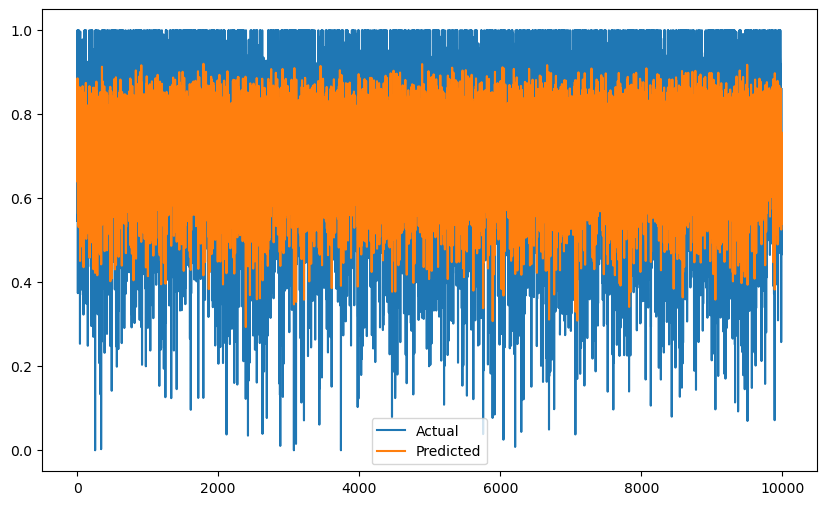

In [19]:
plt.figure(figsize=(10,6))
plt.plot(y_test_inv, label="Actual")
plt.plot(y_pred_inv, label="Predicted")
plt.legend()
plt.show()